In [1]:
import numpy as np 
from scipy.interpolate import interp1d
import os, json, sys
import matplotlib.pyplot as plt

# Monte Carlo

In [1]:
import numpy as np

In [2]:
# Function to generate random compositions
def generate_random_compositions(num_samples):
    compositions = np.zeros((num_samples, 5))
    for i in range(num_samples):
        compositions[i, :] = [
            np.random.choice(A_range),
            np.random.choice(B_range),
            np.random.choice(C_range),
            np.random.choice(D_range),
            np.random.choice(E_range)
        ]
    return compositions

# Function to calculate values
def calculate_values(compositions):
    return np.dot(compositions, coefficients)


In [ ]:
# Coefficients of each element in Value/(kg-hr)
coefficients = np.array([coeff_A, coeff_B, coeff_C, coeff_D, coeff_E])

# Define the range for each element with increments of 0.1%
A_range = np.arange(0, 101, 0.1)
B_range = np.arange(0, 101, 0.1)
C_range = np.arange(0, 41, 0.1)
D_range = np.arange(0, 41, 0.1)
E_range = np.arange(0, 41, 0.1)


# Generate compositions and calculate their values
num_samples = 10000  # Number of samples to generate
compositions = generate_random_compositions(num_samples)
values = calculate_values(compositions)

# Filter compositions based on the value limit
value_limit = 50  # set your specific value limit here
valid_compositions = compositions[values < value_limit]

print("Valid compositions under value limit:")
print(valid_compositions)


# Genetic Algorithm

In [ ]:
from deap import base, creator, tools, algorithms
import random

# Define the environment
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize the objective function
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 100)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, 5)  # 5 elements per individual
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def evaluate(individual):
    value = np.dot(individual, coefficients)
    return (value,)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Load previous population if exists
try:
    previous_population = pd.read_csv('population_data.csv').values.tolist()
    population = [creator.Individual(ind) for ind in previous_population]
except FileNotFoundError:
    population = toolbox.population(n=300)  # Start a new population

# Run the genetic algorithm
n_gen = 40  # Number of generations
for gen in range(n_gen):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population[:] = toolbox.select(offspring, len(population))

# Save population for future continuation
final_population = pd.DataFrame([list(ind) for ind in population])
final_population.to_csv('population_data.csv', index=False)


# Data Loading

## Test Data Loading

In [3]:
import json 

In [4]:
test_file = 'fispact_data/V.json'

In [5]:
v_data = json.load(open(test_file,'r'))
print(v_data.keys())

dict_keys(['run_data', 'inventory_data'])


In [10]:
print(v_data['inventory_data'][2])

{'irradiation_time': 31540000.0, 'cooling_time': 300.0, 'flux': 0.0, 'total_heat': 0.040370588397234605, 'alpha_heat': 0.0, 'beta_heat': 0.010721948884826764, 'gamma_heat': 0.029648639512407843, 'ingestion_dose': 77934.55975269062, 'inhalation_dose': 51456.55837748202, 'dose_rate': {'type': 'Plane source', 'distance': 0.0, 'mass': 0.0, 'dose': 51604.49333078788}, 'nuclides': [{'element': 'H', 'isotope': 1, 'state': '', 'half_life': 0.0, 'grams': 0.017876306162289062, 'activity': 0.0, 'heat': 0.0, 'alpha_heat': 0.0, 'beta_heat': 0.0, 'gamma_heat': 0.0, 'dose': 0.0, 'ingestion': 0.0, 'inhalation': 0.0}, {'element': 'H', 'isotope': 2, 'state': '', 'half_life': 0.0, 'grams': 0.001961280063584738, 'activity': 0.0, 'heat': 0.0, 'alpha_heat': 0.0, 'beta_heat': 0.0, 'gamma_heat': 0.0, 'dose': 0.0, 'ingestion': 0.0, 'inhalation': 0.0}, {'element': 'H', 'isotope': 3, 'state': '', 'half_life': 389105000.0, 'grams': 3.586528665942173e-05, 'activity': 12756910516.086502, 'heat': 1.1665253129426985e

In [11]:
# I want to print all the key value pairs in the v_data['inventory_data'][2] dictionary
for key, value in v_data['inventory_data'][2].items():
    print(key, value)

irradiation_time 31540000.0
cooling_time 300.0
flux 0.0
total_heat 0.040370588397234605
alpha_heat 0.0
beta_heat 0.010721948884826764
gamma_heat 0.029648639512407843
ingestion_dose 77934.55975269062
inhalation_dose 51456.55837748202
dose_rate {'type': 'Plane source', 'distance': 0.0, 'mass': 0.0, 'dose': 51604.49333078788}
nuclides [{'element': 'H', 'isotope': 1, 'state': '', 'half_life': 0.0, 'grams': 0.017876306162289062, 'activity': 0.0, 'heat': 0.0, 'alpha_heat': 0.0, 'beta_heat': 0.0, 'gamma_heat': 0.0, 'dose': 0.0, 'ingestion': 0.0, 'inhalation': 0.0}, {'element': 'H', 'isotope': 2, 'state': '', 'half_life': 0.0, 'grams': 0.001961280063584738, 'activity': 0.0, 'heat': 0.0, 'alpha_heat': 0.0, 'beta_heat': 0.0, 'gamma_heat': 0.0, 'dose': 0.0, 'ingestion': 0.0, 'inhalation': 0.0}, {'element': 'H', 'isotope': 3, 'state': '', 'half_life': 389105000.0, 'grams': 3.586528665942173e-05, 'activity': 12756910516.086502, 'heat': 1.1665253129426985e-08, 'alpha_heat': 0.0, 'beta_heat': 1.16652

In [18]:
nuclides = v_data['inventory_data'][2]['nuclides']
mass = 0 
for nuclide in nuclides:
    if nuclide['grams'] < 1e-6:
        continue
    print(nuclide['element'], nuclide['isotope'], nuclide['grams'], nuclide['activity'], nuclide['dose'])
    mass += nuclide['grams']

H 1 0.017876306162289062 0.0 0.0
H 2 0.001961280063584738 0.0 0.0
H 3 3.586528665942173e-05 12756910516.086502 0.0
He 3 1.0393250399647712e-06 0.0 0.0
He 4 0.009734290648361238 0.0 0.0
Ca 44 1.7155878970572196e-06 0.0 0.0
Ca 45 8.845336640388799e-06 5831763752.986501 1.2799100660507213e-08
Ca 46 1.6894289054658696e-06 0.0 0.0
Sc 45 5.1635377253208215e-06 0.0 0.0
Sc 46 9.886964290763646e-06 12405366508.629147 6.9610621283615846
Sc 47 6.33141496345917e-05 1944157550980.5535 18.015297106061883
Sc 48 0.0008052387384510566 44586828954362.02 42961.29250868116
Ti 46 2.3250855228786308e-05 0.0 0.0
Ti 47 0.004204334224620371 0.0 0.0
Ti 48 0.11143405794713289 0.0 0.0
Ti 49 0.012000318260589806 0.0 0.0
Ti 50 0.684506540944496 0.0 0.0
Ti 51 2.173826499949263e-06 51180721224149.43 3522.8484231068833
V 48 1.8242817812293834e-06 11506235279.166306 9.243123047105875
V 49 0.015393210629790972 4604035606545.789 0.9975950702862061
V 50 6.3185058114032175 0.011952457036163966 5.246070264852084e-12
V 51 99

In [20]:
for i in range(len(v_data['inventory_data'])):
    print(v_data['inventory_data'][i]['cooling_time'], v_data['inventory_data'][i]['dose_rate']['dose'])

0.0 0.0
0.0 62274.44024902535
300.0 51604.49333078788
3900.0 42325.98404098647
90300.0 28924.412379818183
435900.0 6271.530245201319
1645900.0 43.286971536632215
6829900.0 4.806699054692217
22639900.0 1.3726074609438466
54179900.0 0.3060579035325505
157700000.0 0.021597810320689782
315400000.0 0.0004689001430428229
630800000.0 4.319768058338809e-07
1261500000.0 1.0657569704190516e-07
2206600000.0 5.678359061979564e-08
3467600000.0 2.4298905319473826e-08
5044600000.0 8.484335458294393e-09
7252600000.0 1.966793793964254e-09
10406600000.0 2.481926933950561e-10


## Interpolation and Data Loading Functions

In [19]:
def interpolate_element_data(time_data, value_data, fit_type='linear'):
    """
    Interpolates the element data with an option for linear or logarithmic fitting.

    Args:
    time_data (list or np.array): The time points corresponding to the measurements.
    value_data (list or np.array): The Sv/(hr-kg) values at the corresponding time points.
    fit_type (str): Type of interpolation ('linear' or 'log').

    Returns:
    function: An interpolation function that can be used to find new values at any given time.
    """

    # ensure the data is in numpy array format
    time_data = np.array(time_data)
    value_data = np.array(value_data)


    if fit_type == 'log':
        # Apply logarithm to the values, avoiding log(0) by replacing 0 with the smallest non-zero value found in data
        # Handle cases where value_data contains zero or negative values
        min_positive = np.min(value_data[value_data > 0]) if np.any(value_data > 0) else 1e-10  # avoid log(0)
        value_data = np.log(np.where(value_data > 0, value_data, min_positive))
        interpolator = interp1d(time_data, value_data, kind='linear', fill_value="extrapolate", bounds_error=False)
        # Return a lambda that exponentiates the result of the interpolation
        return lambda x: np.exp(interpolator(x))
    elif fit_type == 'linear':
        # Create a linear interpolation function
        interpolator = interp1d(time_data, value_data, kind='linear', fill_value="extrapolate")
        return interpolator

In [20]:
# get a list of the json files in the ../fispact_data directory

def create_interpolators(data_path, fit_type='linear', verbose=False):
    """
    Creates interpolation functions for each element based on data from JSON files.

    Parameters:
    data_path (str): The path to the directory containing the JSON files.

    Returns:
    dict: A dictionary where the keys are element names and the values are interpolation functions.

    """
    json_files = [f for f in os.listdir(data_path) if f.endswith('.json')]
    if verbose:
        print(json_files)

    # Load the data from the json files and create interpolation functions for each element
    element_data = {}
    for file in json_files:
        data = json.load(open(os.path.join('./fispact_data', file), 'r'))
        element = file.split('.')[0]
        time_data = [entry['cooling_time'] for entry in data['inventory_data']]
        value_data = [entry['dose_rate']['dose'] for entry in data['inventory_data']]
        element_data[element] = interpolate_element_data(time_data, value_data, fit_type=fit_type)
    
    return element_data

## Validating Log or Linear Interpolation

In [49]:
time = np.logspace(-2, 10, num=1000)
log_element_data = create_interpolators('./fispact_data',fit_type='log')
lin_element_data = create_interpolators('./fispact_data',fit_type='linear')
lin_v_data = [lin_element_data['V'](t) for t in time]
log_v_data = [log_element_data['V'](t) for t in time]

['V.json', 'Ti.json', 'Zr.json', 'W.json', 'Cr.json']
['V.json', 'Ti.json', 'Zr.json', 'W.json', 'Cr.json']


In [50]:
real_time = []
real_v_data = []
for i in range(len(v_data['inventory_data'])):
    #print(v_data['inventory_data'][i]['cooling_time'], v_data['inventory_data'][i]['dose_rate']['dose'])
    real_time.append(v_data['inventory_data'][i]['cooling_time'])
    real_v_data.append(v_data['inventory_data'][i]['dose_rate']['dose'])

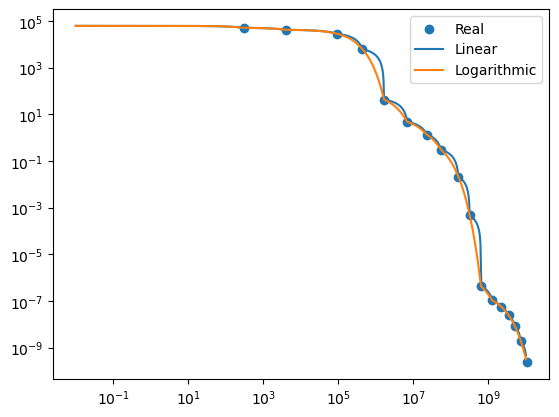

In [51]:
# i want to plot real_time vs real_v_data as a scatter plot, with time vs lin_v_data and time vs log_v_data on the same plot
plt.scatter(real_time, real_v_data, label='Real')
plt.plot(time, lin_v_data, label='Linear')
plt.plot(time, log_v_data, label='Logarithmic')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

## Using Monte Carlo Approach with the Log Interpolation Functions

In [21]:
def generate_random_compositions(element_ranges, num_samples):
    """
    Generates random compositions for specified elements within their ranges.

    Args:
    element_ranges (list of dicts): Each dictionary contains an element and its range (min, max).
    num_samples (int): Number of samples to generate.

    Returns:
    np.array: Randomly generated compositions for each element.
    """
    print(element_ranges)
    elements = [list(range_dict.keys())[0] for range_dict in element_ranges]
    num_elements = len(elements)
    compositions = np.zeros((num_samples, num_elements))
    for idx, element_dict in enumerate(element_ranges):
        element, (low, high) = list(element_dict.items())[0]
        compositions[:, idx] = np.random.uniform(low, high, num_samples)
    return compositions, elements


def calculate_total_sv(compositions, interpolators, times):
    """
    Calculates the total state variable (total_sv) for a given set of compositions, interpolators, and times.

    Parameters:
    compositions (numpy.ndarray): An array of shape (n, m) representing the compositions of the system, where n is the number of samples and m is the number of components.
    interpolators (list): A list of interpolator functions that take a time value as input and return a value for each sample.
    times (numpy.ndarray): An array of shape (p,) representing the time values at which to evaluate the interpolators.

    Returns:
    numpy.ndarray: An array of shape (n, p) representing the total state variable values for each sample at each time point.
    """
    total_sv = np.zeros((len(compositions), len(times)))
    for i, time in enumerate(times):
        for j, interp in enumerate(interpolators):
            total_sv[:, i] += interp(time) * compositions[:, j]  # Assuming linearity
    return total_sv

def explore_compositions(element_ranges, interpolators, num_samples, value_limits, times):
    """
    Evaluates random compositions to find those that are under specified value limits at corresponding times.

    Args:
    element_ranges (list of dicts): Min and max ranges for each element.
    interpolators (dict): Dictionary of interpolators keyed by element.
    num_samples (int): Number of samples to generate.
    value_limits (list of floats): Value limits corresponding to each time in `times`.
    times (list of floats): Specific times to evaluate the compositions.

    Returns:
    list: Valid compositions for each time.
    """
    # Generate random compositions
    compositions, elements = generate_random_compositions(element_ranges, num_samples)

    # Calculate total Sv/(hr-kg) for these compositions at each specified time
    valid_compositions_per_time = []
    for time_idx, time in enumerate(times):
        total_sv = np.zeros(num_samples)
        for element in elements:
            if element in interpolators:
                total_sv += interpolators[element](time) * compositions[:, elements.index(element)]
        print(total_sv)
        
        # Filter compositions based on the value limit for this specific time
        valid_compositions = compositions[total_sv < value_limits[time_idx]]
        valid_compositions_per_time.append((time, valid_compositions))

    return valid_compositions_per_time



In [29]:
print(interpolators['V'](100))
print(interpolators.keys())

58492.797757738466
dict_keys(['V', 'Ti', 'Zr', 'W', 'Cr'])


In [25]:
element_ranges = [{'V':(0, 1)}, {'W' :(0, 1)}, {'Cr' : (0, 0.4)}, {'Ti' : (0, 0.4)}, {'Zr' : (0, 0.4)}]  # Example ranges for elements A, B, C, D, E
num_samples = 10  # Number of random samples
value_limits = [1e3, 1e1,1e-2,1e-4]  # Value limits for Sv/(hr-kg) corresponding to the times
times = [3.41e7/12, 3.41e7,3.41e8,2*3.41e9]  # Times in seconds to check

interpolators = create_interpolators('./fispact_data', fit_type='log')
for interp in interpolators:
    print(interp)
# Assume 'interpolators' are functions that have been defined for each element
valid_compositions = explore_compositions(element_ranges, interpolators, num_samples, value_limits, times)
for time, compositions in valid_compositions:
    print(f"Valid compositions at {time} seconds:", compositions)


V
Ti
Zr
W
Cr
[{'V': (0, 1)}, {'W': (0, 1)}, {'Cr': (0, 0.4)}, {'Ti': (0, 0.4)}, {'Zr': (0, 0.4)}]
[18082.48550874 14179.76292929 20620.25233631  8503.25148184
 15174.86817214 13552.84199756   452.04788959 10886.4315584
  9805.97342784  5804.54439785]
[776.87531983 594.47129873 833.98295452 353.32192922 726.3096224
 592.4541292   17.66288819 418.51995372 423.67402862 247.31935537]
[0.00234673 0.00302297 0.00226138 0.00163573 0.00282272 0.0026411
 0.00058548 0.00232762 0.00221494 0.00217748]
[2.92890230e-04 2.81767480e-04 3.94357989e-04 1.85455069e-04
 1.04008759e-04 1.99603514e-04 1.39398145e-06 2.80681624e-04
 1.49704544e-04 1.41013311e-04]
Valid compositions at 2841666.6666666665 seconds: [[9.77272202e-01 1.04678723e-01 8.58304344e-02 5.54775783e-03
  4.56372917e-04]]
Valid compositions at 34100000.0 seconds: []
Valid compositions at 341000000.0 seconds: [[6.93323244e-01 3.62445289e-01 1.28768984e-01 3.07349761e-01
  2.74020080e-01]
 [6.34192859e-01 9.75091167e-01 1.65324178e-01 1.885

## using genetic algorithm

In [2]:
from deap import base, creator, tools, algorithms
import random
import numpy as np

class Individual:
    def __init__(self, values):
        self.values = values

    def __getitem__(self, key):
        return self.values[key]

    def __setitem__(self, key, value):
        self.values[key] = value

    def __len__(self):
        return len(self.values)

def create_environment(num_elements, increment):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", Individual, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    # Attribute generator: generate numbers rounded to the nearest increment
    def attr_float():
        return round(random.uniform(0, 1) / increment) * increment
    
    # Custom individual creation with normalization to ensure sum to 1
    def create_individual():
        values = [attr_float() for _ in range(num_elements)]
        total = sum(values)
        normalized_values = [x / total for x in values]
        return creator.Individual(normalized_values)

    toolbox.register("individual", create_individual)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Evaluation function
    def evaluate(ind):
        return (abs(1 - sum(ind)),)

    toolbox.register("evaluate", evaluate)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=increment, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    return toolbox

# Parameters
num_elements = 5
increment = 0.01

toolbox = create_environment(num_elements, increment)

# Generate the population
population = toolbox.population(n=10000)
num_generations = 40

# Run the genetic algorithm
for gen in range(num_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, len(population))

# Select the best individual
top_individual = tools.selBest(population, 1)[0]
print("Best composition:", top_individual.values)
print("With sum:", sum(top_individual.values))


Best composition: [0.309433962264151, 0.041509433962264156, 0.2792452830188679, 0.13962264150943396, 0.23018867924528302]
With sum: 1.0


In [32]:
import os
import json
import numpy as np
from scipy.interpolate import interp1d
from deap import base, creator, tools, algorithms
import random

# Assume interpolators have been created and loaded as described
interpolators = create_interpolators('./fispact_data', fit_type='log')

def evaluate(individual, interpolators, time_point):
    """
    Evaluate the fitness of an individual at a specific time using interpolators.

    Args:
    individual (Individual): The individual to evaluate.
    interpolators (dict): Dictionary of interpolation functions keyed by element names.
    time_point (float): The time at which to evaluate the element properties.

    Returns:
    tuple: A tuple representing the fitness of the individual.
    """
    # Assuming the individual's elements are in the same order as keys in interpolators
    element_keys = list(interpolators.keys())  # Ensure consistent ordering
    element_values = [interpolators[element](time_point) for element in element_keys]
    # Calculate the dot product of the composition and element values as a fitness measure
    fitness = np.dot(np.array(individual), element_values)
    return (fitness,)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", lambda: round(random.uniform(0, 1), 2))  # Modify as necessary
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=len(interpolators))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate, interpolators=interpolators, time_point=100000)  # Example time point
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.01, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Example execution
population = toolbox.population(n=300)
num_generations = 40
for gen in range(num_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, len(population))

top_individual = tools.selBest(population, 1)[0]
print("Best composition:", top_individual)
print("Fitness:", top_individual.fitness.values)


Best composition: [0.9843392906978194, 1.0895630094943523, 1.1552286611479354, 0.9124816284659293, 0.9889398964652267]
Fitness: (338018.1371616627,)


## now using a composition class

In [2]:
# cached interpolators
from functools import lru_cache
from scipy.interpolate import interp1d
import numpy as np

def interpolate_element_data(time_data, value_data, fit_type='linear'):
    """
    Interpolates the element data with an option for linear or logarithmic fitting.
    Returns a cached interpolation function.
    """
    time_data = np.array(time_data)
    value_data = np.array(value_data)

    if fit_type == 'log':
        min_positive = np.min(value_data[value_data > 0]) if np.any(value_data > 0) else 1e-10
        value_data = np.log(np.where(value_data > 0, value_data, min_positive))
        interpolator = interp1d(time_data, value_data, kind='linear', fill_value="extrapolate", bounds_error=False)
        # Cache the result of the exponentiated interpolation
        @lru_cache(maxsize=None)  # No limit to cache size
        def cached_interpolator(x):
            return np.exp(interpolator(x))
        return cached_interpolator
    else:
        interpolator = interp1d(time_data, value_data, kind='linear', fill_value="extrapolate")
        # Cache the linear interpolation
        @lru_cache(maxsize=None)  # No limit to cache size
        def cached_interpolator(x):
            return interpolator(x)
        return cached_interpolator

# get a list of the json files in the ../fispact_data directory

def create_interpolators(data_path, fit_type='linear', verbose=False):
    """
    Creates interpolation functions for each element based on data from JSON files.

    Parameters:
    data_path (str): The path to the directory containing the JSON files.

    Returns:
    dict: A dictionary where the keys are element names and the values are interpolation functions.

    """
    json_files = [f for f in os.listdir(data_path) if f.endswith('.json')]
    if verbose:
        print(json_files)

    # Load the data from the json files and create interpolation functions for each element
    element_data = {}
    for file in json_files:
        data = json.load(open(os.path.join('./fispact_data', file), 'r'))
        element = file.split('.')[0]
        time_data = [entry['cooling_time'] for entry in data['inventory_data']]
        value_data = [entry['dose_rate']['dose'] for entry in data['inventory_data']]
        element_data[element] = interpolate_element_data(time_data, value_data, fit_type=fit_type)
    
    return element_data

In [3]:
from deap import base, creator, tools, algorithms
import random
import numpy as np

class Composition:
    def __init__(self, elements, fractions):
        assert len(elements) == len(fractions)
        self.composition = dict(zip(elements, fractions))
        self.normalize()

    def normalize(self):
        total = sum(self.composition.values())
        for key in self.composition:
            self.composition[key] /= total

    def __getitem__(self, key):
        return self.composition.get(key, 0)

    def __setitem__(self, key, value):
        self.composition[key] = value
        self.normalize()

    def __len__(self):
        return len(self.composition)

    def items(self):
        return self.composition.items()

#elements = ['', 'B', 'C', 'D', 'E']  # Example elements
interpolators = create_interpolators('./fispact_data', fit_type='log')

elements = list(interpolators.keys())
print(elements)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", Composition, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

def attr_float():
    return random.uniform(0, 1)

def create_individual():
    fractions = [attr_float() for _ in elements]
    return creator.Individual(elements, fractions)

toolbox.register("individual", create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


['V', 'Zr', 'Ti', 'W', 'Cr']


In [23]:
"""
def mutate(individual):
    elem_to_mutate = random.choice(list(individual.composition.keys()))
    individual[elem_to_mutate] += random.choice([-0.01, 0.01])  # Adjust mutation step size as necessary
    individual.normalize()
"""

def mutate(individual,indpb):
    """Perform a mutation operation on an individual with a probability indpb."""
    if random.random() < indpb:
        elem_to_mutate = random.choice(list(individual.composition.keys()))
        mutation_amount = random.choice([-0.05, 0.05])  # Adjust mutation step size as necessary
        if 0 <= individual[elem_to_mutate] + mutation_amount <= 1:
            individual[elem_to_mutate] += mutation_amount
    individual.normalize()
    return (individual,)  # Return a tuple containing the individual
   

def _crossover(ind1, ind2):
    """Perform a crossover operation between two individuals."""
    # Get a crossover point
    keys = list(ind1.composition.keys())
    cx_point = random.randint(1, len(keys) - 1)
    # Swap the values at the crossover point
    for key in keys[cx_point:]:
        ind1[key], ind2[key] = ind2[key], ind1[key]
    ind1.normalize()
    ind2.normalize()
    return ind1, ind2

def crossover(ind1, ind2):
    """Perform a crossover operation between two individuals."""
    if random.random() < 0.5:  # Example probability check for crossover occurrence
        # Get a crossover point, make sure it works with dictionary keys
        keys = list(ind1.composition.keys())
        cx_point = random.randint(1, len(keys) - 1)
        for key in keys[cx_point:]:
            ind1[key], ind2[key] = ind2[key], ind1[key]
        ind1.normalize()
        ind2.normalize()
    return ind1, ind2




toolbox.register("mate", crossover)  # using our custom crossover function 
toolbox.register("mutate", mutate, indpb=0.2) # using our custom mutation function
toolbox.register("select", tools.selTournament, tournsize=3)


In [24]:
def _evaluate(individual, interpolators, time_limits):
    """
    Evaluate the individual against multiple time-dependent value limits.

    Args:
    individual (Individual): The individual to evaluate.
    interpolators (dict): Dictionary of interpolation functions keyed by element.
    time_limits (list of tuples): Each tuple contains a time and the corresponding value limit.

    Returns:
    tuple: Fitness value; lower is better.
    """
    max_value_exceeded = 0
    for time, limit in time_limits:
        total_value = sum(individual[element] * interpolator(time) for element, interpolator in interpolators.items())
        if total_value > limit:
            max_value_exceeded += total_value - limit

    return (max_value_exceeded,)

def _evaluate(individual, interpolators, time_limits):
    """
    Evaluate the individual against multiple time-dependent value limits.
    Penalize based on the sum of all excess values over the limit at each time point.

    Args:
    individual (Individual): The individual to evaluate.
    interpolators (dict): Dictionary of interpolation functions keyed by element names.
    time_limits (list of tuples): Each tuple contains a time and the corresponding value limit.

    Returns:
    tuple: Fitness value; lower is better. Sum of all violations across time points.
    """
    total_penalty = 0  # Total penalty accumulates penalties from all time points
    for time, limit in time_limits:
        # Calculate the total interpolated value at this time
        total_value = sum(individual[element] * interpolator(time) for element, interpolator in interpolators.items() if element in individual)
        # If the total value exceeds the limit, add the excess to the total penalty
        if total_value > limit:
            excess = total_value - limit
            # Apply a scaling factor to the excess if desired, e.g., square the excess
            penalty = excess ** 2  # Squaring the excess to increase penalty progressively
            total_penalty += penalty

    return (total_penalty,)

def _evaluate(individual, interpolators, time_limits, strategy='sum', importance_factors=None):
    """
    Evaluate the individual with flexible strategies based on provided parameters.

    Args:
    individual (Individual): The individual to evaluate.
    interpolators (dict): Interpolation functions for each element.
    time_limits (list of tuples): Time points and their corresponding value limits.
    strategy (str): Determines how to aggregate penalties ('sum', 'max', 'strict').
    importance_factors (dict): Dictionary of time points and their importance factors.

    Returns:
    tuple: Fitness value; lower is better.
    """
    penalties = []
    for time, limit in time_limits:
        total_value = sum(individual[element] * interpolator(time) for element, interpolator in interpolators.items() if element in individual)
        if total_value > limit:
            excess = total_value - limit
            # Apply importance factor if specified
            if importance_factors and time in importance_factors:
                excess *= importance_factors[time]
            penalties.append(excess)

    if strategy == 'sum':
        total_penalty = sum(penalties)
    elif strategy == 'max':
        total_penalty = max(penalties) if penalties else 0
    elif strategy == 'strict':
        total_penalty = sum(p ** 2 for p in penalties)  # Squaring penalties for a stricter evaluation

    return (total_penalty,)

def evaluate(individual, time_limits, interpolators, importance_factors=None):
    penalties = []
    for time, limit in time_limits:
        # Use individual.items() to iterate over elements and their fractions
        total_value = sum(fraction * interpolators[element](time) for element, fraction in individual.items() if element in interpolators)
        if total_value > limit:
            penalties.append(total_value - limit)

    # Example: Use sum as aggregation strategy
    if importance_factors:
        penalties = [penalty * importance_factors[time] for time, penalty in zip(importance_factors, penalties)]
    total_penalty = sum(penalties)
    return (total_penalty,)


# Update toolbox registration with correct parameters
toolbox.register("evaluate", evaluate, interpolators=interpolators, time_limits=[(3.41e7/12, 1e4), (3.41e7, 1e1), (3.41e8, 1e-1)], importance_factors = {3.41e7/12: 0.5, 3.41e7: 1, 3.41e8: 2.5})


In [25]:
from tqdm import tqdm

import cProfile
import pstats


population = toolbox.population(n=1000)
num_generations = 40 
def run_algorithm(population, num_generations):
    # Wrap the range function with tqdm to show a progress bar
    for gen in tqdm(range(num_generations), desc='Evolving Generations'):
        # Apply crossover and mutation on the population
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation population
        population = toolbox.select(offspring, len(population))

    top_individual = tools.selBest(population, 100)
    #for ind in top_individual:
        #print("Best composition:", ind.composition)
        #print("Fitness:", ind.fitness.values)
    return top_individual

profiler = cProfile.Profile()
profiler.enable()
top_individuals = run_algorithm(population=population, num_generations=num_generations)
profiler.disable()

stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats()

Evolving Generations: 100%|██████████| 40/40 [00:01<00:00, 28.54it/s]

         7358818 function calls (6678818 primitive calls) in 1.404 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    1.404    0.702 /home/myless/.mambaforge/envs/chgnet/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3514(run_code)
        2    0.000    0.000    1.404    0.702 {built-in method builtins.exec}
        1    0.000    0.000    1.404    1.404 /tmp/ipykernel_2524/1364317530.py:1(<module>)
        1    0.022    0.022    1.404    1.404 /tmp/ipykernel_2524/1364317530.py:9(run_algorithm)
       40    0.015    0.000    1.067    0.027 /home/myless/.mambaforge/envs/chgnet/lib/python3.10/site-packages/deap/algorithms.py:33(varAnd)
       40    0.011    0.000    0.986    0.025 /home/myless/.mambaforge/envs/chgnet/lib/python3.10/site-packages/deap/algorithms.py:68(<listcomp>)
680000/40000    0.364    0.000    0.975    0.000 /home/myless/.mambaforge/envs/chgnet/lib/python3.10/copy

In [26]:
test_data = {}
for i, ind in enumerate(top_individuals):
    test_data[i] = {'composition': ind.composition, 'fitness': ind.fitness.values}
    print("Best composition:", ind.composition)
    print("Fitness:", ind.fitness.values)

#json.dump(test_data, open('test_data.json', 'w'))

Best composition: {'V': 0.6837757386162056, 'Zr': 0.00803950320561404, 'Ti': 0.00020162815249610816, 'W': 0.0045791696278502814, 'Cr': 0.30340396039783396}
Fitness: (0.0,)
Best composition: {'V': 0.6789387422773245, 'Zr': 0.007982632150711337, 'Ti': 0.00021175071691050142, 'W': 0.003307238526783708, 'Cr': 0.3095596363282699}
Fitness: (0.0,)
Best composition: {'V': 0.6708998338871791, 'Zr': 0.007888114568231729, 'Ti': 0.00021311138232379376, 'W': 0.0033947187903362822, 'Cr': 0.31760422137192906}
Fitness: (0.0,)
Best composition: {'V': 0.6835166378822168, 'Zr': 0.006774803714943167, 'Ti': 0.00017309717819605374, 'W': 0.004105433174104167, 'Cr': 0.3054300280505398}
Fitness: (0.0,)
Best composition: {'V': 0.6702064527169042, 'Zr': 0.0059089364762941856, 'Ti': 0.00019749249682009116, 'W': 0.0044308823069891794, 'Cr': 0.3192562360029924}
Fitness: (0.0,)
Best composition: {'V': 0.6741018871757808, 'Zr': 0.007888877543759389, 'Ti': 0.0002074743449313509, 'W': 0.00349927343050934, 'Cr': 0.31430

In [20]:
import pandas as pd
import plotly.express as px

import pandas as pd

def create_dataframe_from_dict(data_dict):
    """
    Converts a dictionary with nested 'composition' and optional 'fitness' into a DataFrame.
    
    Args:
    data_dict (dict): Dictionary with keys as indices and values containing 'composition' and optionally 'fitness'.
    
    Returns:
    pd.DataFrame: DataFrame with compositions and fitness as columns.
    """
    # Prepare lists to hold compositions and fitness values
    compositions = []
    fitness_values = []
    
    # Iterate through the dictionary to extract compositions and fitness values
    for key, value in data_dict.items():
        compositions.append(value['composition'])
        # Check if fitness is present
        if 'fitness' in value:
            fitness_values.append(value['fitness'][0])  # Assuming fitness is always a list with one item

    # Create DataFrame from compositions
    df_compositions = pd.DataFrame(compositions)
    
    # Add fitness column if fitness values were extracted
    if fitness_values:
        df_compositions['Fitness'] = fitness_values
    
    return df_compositions


def create_parallel_coordinates_plot(df, fitness_col=None):
    """
    Creates an interactive parallel coordinates plot from a DataFrame.
    
    Args:
    df (pd.DataFrame): DataFrame containing composition data with columns as elements.
    fitness_col (str, optional): Column name for the fitness values, used for coloring.
    
    Returns:
    plotly.graph_objects.Figure: The interactive plot.
    """
    if fitness_col and fitness_col in df.columns:
        color = fitness_col
    else:
        color = df.columns[0]  # Default to the first element if no fitness column is provided

    labels = {col: f"{col} (wt%)" for col in df.columns if col != fitness_col}
    
    fig = px.parallel_coordinates(df, color=color, labels=labels,
                                  color_continuous_scale=px.colors.diverging.Tealrose,
                                  color_continuous_midpoint=df[color].median())
    return fig


In [27]:
df = create_dataframe_from_dict(test_data)
print(df.head())

          V        Zr        Ti         W        Cr  Fitness
0  0.683776  0.008040  0.000202  0.004579  0.303404      0.0
1  0.678939  0.007983  0.000212  0.003307  0.309560      0.0
2  0.670900  0.007888  0.000213  0.003395  0.317604      0.0
3  0.683517  0.006775  0.000173  0.004105  0.305430      0.0
4  0.670206  0.005909  0.000197  0.004431  0.319256      0.0


In [30]:
plot = create_parallel_coordinates_plot(df, fitness_col='Fitness')
html_plot = plot.to_html('parallel_coordinates_plot.html', include_plotlyjs='cdn')

# now save the html plot to a file
with open('parallel_coordinates_plot.html', 'w') as f:
    f.write(html_plot)